In [1]:
import pandas as pd
import numpy as np
from  statsmodels.tsa.api import SimpleExpSmoothing
import matplotlib.pyplot as plt

In [9]:
draw=pd.read_csv('C:/University/BDA/TimeSeries/Lab2/AlgeriaExport.txt',header=None)

In [10]:
draw.head()

,0
0,39.043173
1,46.244557
2,19.793873
3,24.684682
4,25.084059


In [11]:
index=pd.date_range(start="1960", end="2018", freq="Y")

In [12]:
index

DatetimeIndex(['1960-12-31', '1961-12-31', '1962-12-31', '1963-12-31',
               '1964-12-31', '1965-12-31', '1966-12-31', '1967-12-31',
               '1968-12-31', '1969-12-31', '1970-12-31', '1971-12-31',
               '1972-12-31', '1973-12-31', '1974-12-31', '1975-12-31',
               '1976-12-31', '1977-12-31', '1978-12-31', '1979-12-31',
               '1980-12-31', '1981-12-31', '1982-12-31', '1983-12-31',
               '1984-12-31', '1985-12-31', '1986-12-31', '1987-12-31',
               '1988-12-31', '1989-12-31', '1990-12-31', '1991-12-31',
               '1992-12-31', '1993-12-31', '1994-12-31', '1995-12-31',
               '1996-12-31', '1997-12-31', '1998-12-31', '1999-12-31',
               '2000-12-31', '2001-12-31', '2002-12-31', '2003-12-31',
               '2004-12-31', '2005-12-31', '2006-12-31', '2007-12-31',
               '2008-12-31', '2009-12-31', '2010-12-31', '2011-12-31',
               '2012-12-31', '2013-12-31', '2014-12-31', '2015-12-31',
      

In [13]:
df=draw.set_index(index)
df.head()

,0
1960-12-31,39.043173
1961-12-31,46.244557
1962-12-31,19.793873
1963-12-31,24.684682
1964-12-31,25.084059


<AxesSubplot:>

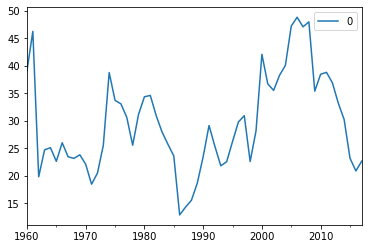

In [14]:
df.plot()

In [15]:
fit1=SimpleExpSmoothing(df,initialization_method="heuristic").fit(smoothing_level=0.2,optimized=False)
fcast1=fit1.forecast(3).rename(r"$\alpha= 0.2 $")

C:\Users\maxgr\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [16]:
fit2=SimpleExpSmoothing(df,initialization_method="heuristic").fit(smoothing_level=0.6,optimized=False)
fcast2=fit2.forecast(3).rename(r"$\alpha= 0.6 $")

In [21]:
fit3=SimpleExpSmoothing(df,initialization_method="estimated").fit()
a=fit3.model.params["smoothing_level"]
print(a)
fcast3=fit3.forecast(3).rename(r"$\alpha= %s $" % a)

0.839783363291822


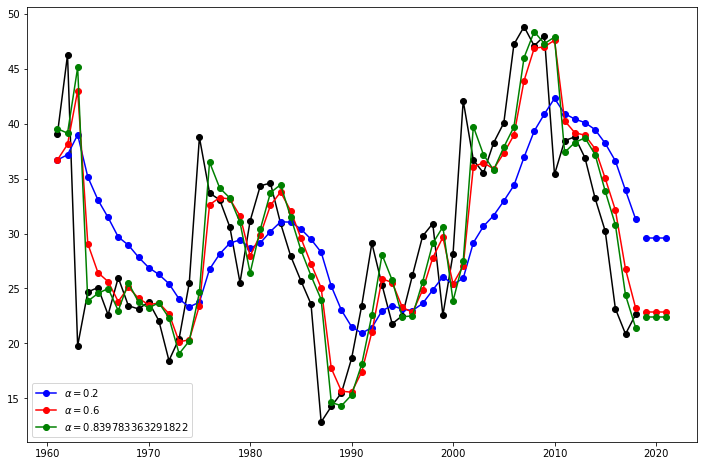

In [22]:
plt.figure(figsize=(12,8))
plt.plot(df,marker="o", color="black")
plt.plot(fit1.fittedvalues, marker="o", color="blue")
(line1, )=plt.plot(fcast1,marker="o", color="blue")

plt.plot(fit2.fittedvalues, marker="o", color="red")
(line2, )=plt.plot(fcast2,marker="o", color="red")

plt.plot(fit3.fittedvalues, marker="o", color="green")
(line3, )=plt.plot(fcast3,marker="o", color="green")

plt.legend([line1,line2,line3],[fcast1.name, fcast2.name,fcast3.name])




